In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('datasets/Minimum Wage Data.csv',encoding='latin')

In [3]:
df.head()

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [4]:
df.to_csv('datasets/minwage.csv',encoding='utf-8')

In [5]:
df = pd.read_csv('datasets/minwage.csv')

In [6]:
df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [7]:
gb = df.groupby('State')
gb.get_group("Alabama").set_index("Year").head(100)

,Unnamed: 0,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,,
1968,0,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1969,55,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
1970,110,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
1971,165,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
1972,220,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0
1973,275,Alabama,...,NaN,0.0,0.0,44.400000,0.0,0.0
1974,330,Alabama,...,NaN,0.0,0.0,49.308333,0.0,0.0
1975,385,Alabama,...,NaN,0.0,0.0,53.816667,0.0,0.0
1976,440,Alabama,...,NaN,0.0,0.0,56.908333,0.0,0.0


In [8]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby('State'):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))
act_min_wage.head(10)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.00,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.00,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.00,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.00,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.00,9.58,7.19,8.68,8.98
1973,0.0,11.84,2.64,6.77,9.31,5.64,10.43,9.02,9.02,9.02,...,0.0,7.90,NaN,6.77,9.02,0.00,9.02,6.77,8.18,8.46
1974,0.0,10.66,2.38,6.09,8.38,5.08,9.39,8.13,8.13,8.13,...,0.0,7.11,NaN,6.09,8.13,0.00,8.13,6.09,7.36,7.62
1975,0.0,9.77,2.18,5.58,7.68,4.65,8.61,7.44,7.44,7.44,...,0.0,6.51,NaN,5.58,7.44,0.00,7.44,5.58,6.75,6.98
1976,0.0,12.32,0.00,8.36,8.80,4.40,9.72,8.80,9.90,9.68,...,0.0,6.16,NaN,6.82,10.12,8.80,9.68,8.80,9.24,7.04


In [9]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,...,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,...,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,...,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,...,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,...,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,...,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010000,...,0.0,8.380000,10.010000,8.330000,10.320000,8.800000,11.520000,9.130000,9.660000,8.980000


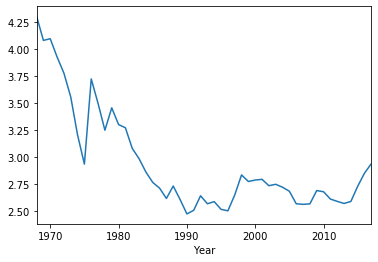

In [10]:
act_min_wage.std(axis=1).plot()

In [11]:
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

In [12]:
import matplotlib.pyplot as plt 


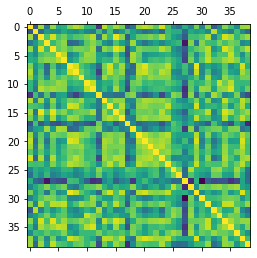

In [13]:
plt.matshow(min_wage_corr)
plt.show()

[Text(0, 0, 'Al'),
 Text(0, 0, 'Ar'),
 Text(0, 0, 'Ca'),
 Text(0, 0, 'Co'),
 Text(0, 0, 'Co'),
 Text(0, 0, 'De'),
 Text(0, 0, 'Di'),
 Text(0, 0, 'Fe'),
 Text(0, 0, 'Gu'),
 Text(0, 0, 'Ha'),
 Text(0, 0, 'Id'),
 Text(0, 0, 'In'),
 Text(0, 0, 'Ke'),
 Text(0, 0, 'Ma'),
 Text(0, 0, 'Ma'),
 Text(0, 0, 'Ma'),
 Text(0, 0, 'Mi'),
 Text(0, 0, 'Mi'),
 Text(0, 0, 'Ne'),
 Text(0, 0, 'Ne'),
 Text(0, 0, 'Ne'),
 Text(0, 0, 'Ne'),
 Text(0, 0, 'Ne'),
 Text(0, 0, 'Ne'),
 Text(0, 0, 'No'),
 Text(0, 0, 'No'),
 Text(0, 0, 'Oh'),
 Text(0, 0, 'Ok'),
 Text(0, 0, 'Or'),
 Text(0, 0, 'Pe'),
 Text(0, 0, 'Pu'),
 Text(0, 0, 'Rh'),
 Text(0, 0, 'So'),
 Text(0, 0, 'Ut'),
 Text(0, 0, 'Ve'),
 Text(0, 0, 'Wa'),
 Text(0, 0, 'We'),
 Text(0, 0, 'Wi'),
 Text(0, 0, 'Wy')]

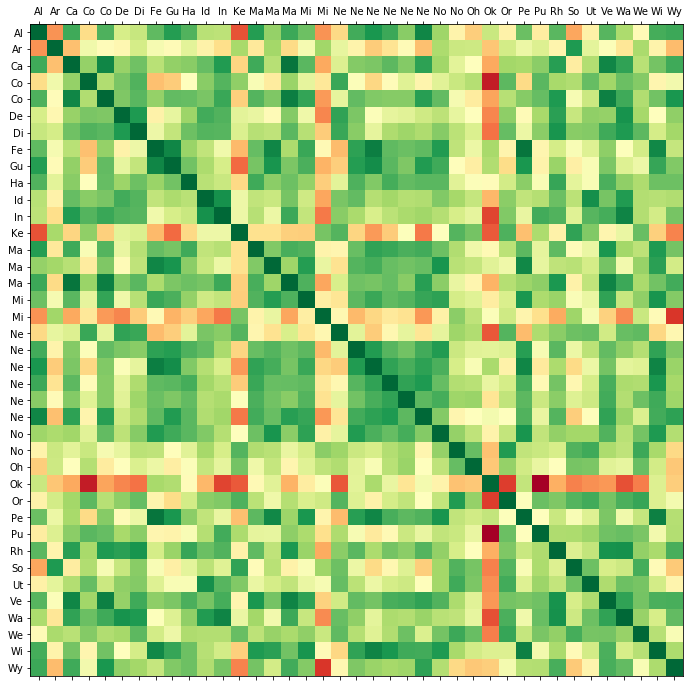

In [14]:
labels = [c[:2] for c in min_wage_corr.columns]  # get abbv state names.

fig = plt.figure(figsize=(12,12))  # figure so we can add axis
ax = fig.add_subplot(111)  # define axis, so we can modify
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)  # display the matrix
ax.set_xticks(np.arange(len(labels)))  # show them all!
ax.set_yticks(np.arange(len(labels)))  # show them all!
ax.set_xticklabels(labels)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)



In [16]:
dfs = pd.read_html("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
for postalcodes in dfs:
    print(postalcodes.head())

  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa          NaN          AS
1                Guam         Guam          GU
2    Marshall Islands          NaN          MH
3          Micronesia          NaN          FM
4   Northern Marianas          NaN          MP


In [17]:
state_abbv = dfs[0]
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [18]:
state_abbv.to_csv('datasets/state_abbv.csv')

In [19]:
state_abbv = pd.read_csv("datasets/state_abbv.csv")
state_abbv.head()

,Unnamed: 0,State/District,Abbreviation,Postal Code
0,0,Alabama,Ala.,AL
1,1,Alaska,Alaska,AK
2,2,Arizona,Ariz.,AZ
3,3,Arkansas,Ark.,AR
4,4,California,Calif.,CA


In [20]:
state_abbv[["State/District", "Postal Code"]].to_csv("datasets/state_abbv.csv", index=False)

In [22]:
state_abbv = pd.read_csv("datasets/state_abbv.csv", index_col=0)
state_abbv

,Postal Code
State/District,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA
Colorado,CO
Connecticut,CT
Delaware,DE
District of Columbia,DC


In [23]:
abbv_dict = state_abbv.to_dict()
print(abbv_dict)

{'Postal Code': {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}}


In [24]:
abbv_dict = abbv_dict['Postal Code']
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [30]:
abbv_dict['Federal (FLSA)'] = "FLSA"
abbv_dict['Guam'] = "GU"
abbv_dict['Puerto Rico'] = "PR"
labels = [abbv_dict[c] for c in min_wage_corr.columns]

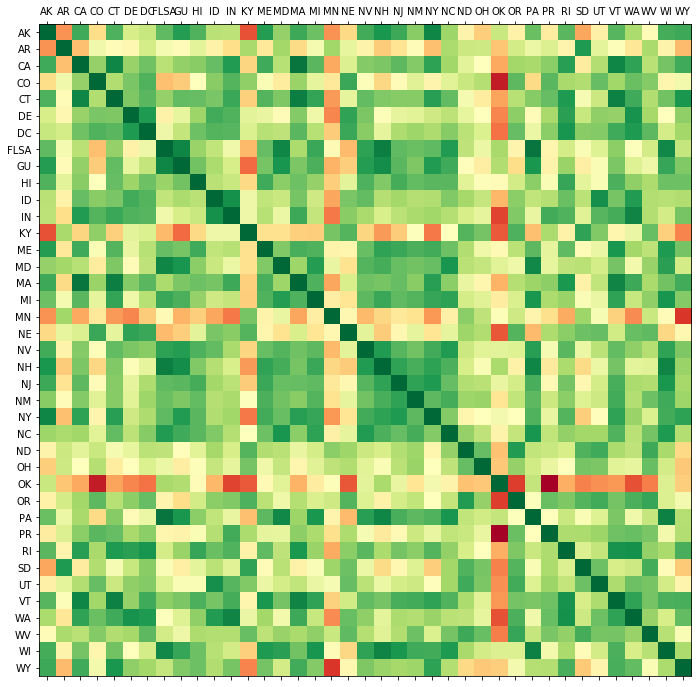

In [31]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()